In [2]:
import pandas as pd
import numpy as np
import glob
import matplotlib.pyplot as plt

from pathlib import Path
import pathlib
import shutil

from matplotlib import pyplot as plt
from IPython.display import clear_output
import numpy as np

import re
import os

import sys
sys.path.insert(0, os.path.abspath('../'))
import ansim.loader
import ansim.properties


### NOTE. Before running this notebook please make sure that the data paths are set correctly in the ansim/properties.py file

### This notebook  goal is to load the ansim data and to get general insights about the data, or specific insight about a run. It is also to do the initial clean up (removing files less than 100 MB)

## Removing the files less than 100 MB

In [13]:
ansim.loader.clean_runs()

Current number of runs is:  73
Number of runs after removing small files is:  73


## Fetching channels description

##### Channel IDs do not matter. The mapping of the data is based on Signal and Description

In [14]:
desc_df = ansim.loader.get_description_file()
desc_df

NOTE: Channel IDs do not matter. What is important here is Signal and Description.


,Channel,Signal,Description,Device,Device-Info
id,,,,,
CH01,Channel_01,"ECG - ECG A, X, ECG2-R",electrocardiogram_signal,BIOPAC_BIONOMADIX ECG-Transmitter,https://www.biopac.com/product/bionomadix-2ch-...
CH02,Channel_02,NIBP - NIBP100A,noininvasible_blood_pressure,BIOPAC NIBP100A (Vasotrac),https://www.biopac.com/manual/nibp100a-vasotra...
CH03,Channel_03,"Zth - Z, X, NICO-R",base_thoracic_impedance_cardiac_output,BIOPAC BIONOMADIX NICO-Transmitter,https://www.biopac.com/product/bionomadix-wire...
CH04,Channel_04,ERGO_RPM,ergometer_rounds_per_minute,Lode ergometer,https://lode.nl/en/categories/bicycle-ergometer/3
CH05,Channel_05,ERGO_PWR,ergometer_watt_load,Lode ergometer,NaN
CH06,Channel_06,"ZTH-dZ/dt, X, NICO-R",cardiac_output_impedance_change,BIOPAC BIONOMADIX NICO-Transmitter,https://www.biopac.com/product/bionomadix-wire...
CH07,Channel_07,SLDE_POS,sledge_position,NaN,NaN
CH08,Channel_08,Gx,G-force_x_axis,External G-Sensor,NaN
CH09,Channel_09,Gy,G-force_y_axis,External G-Sensor,NaN


## Fetching the runs overview
subject, run, signal source, etc.

In [15]:

runs_overview_df = ansim.loader.get_runs_overview(save=True)

The runs overview dataframe was saved as csv in ../out/runs_overview.csv


In [16]:
ansim.loader.print_runs_overview(runs_overview_df)

overall stats:
# of files:  73
# of unique subjects:  18
# of unique runs:  2
# of unique signal source:  2
# of unique scsp:  2


In [17]:
print('subject runs count:')
runs_overview_df.subject.value_counts()

subject runs count:


0AA    5
0AB    4
0AU    4
0AW    4
0AL    4
0AM    4
0AD    4
0AF    4
0AP    4
0AS    4
0AR    4
0AQ    4
0AH    4
0AC    4
0AK    4
0AG    4
0AJ    4
0AN    4
Name: subject, dtype: int64

In [18]:
print('Subject vs run type counts:')

runs_per_subjects = pd.crosstab(runs_overview_df['subject'], runs_overview_df['run']) 
runs_per_subjects
# each subject has 2 001 runs and 2 002 runs. Except subject 0AA, had 3 001 runs

Subject vs run type counts:


run,001,002
subject,,
0AA,3,2
0AB,2,2
0AC,2,2
0AD,2,2
0AF,2,2
0AG,2,2
0AH,2,2
0AJ,2,2
0AK,2,2


In [21]:
print('run vs source type counts:')

source_per_subjects = pd.crosstab(runs_overview_df['run'], runs_overview_df['signal_source']) # each subject has 2 001 runs and 2 002 runs
source_per_subjects

# Only one subject used F1n1E

run vs source type counts:


signal_source,BIO1E,FIN1E
run,,
001,34,3
002,36,0


In [22]:
print('Subject vs source type counts:')

source_per_subjects = pd.crosstab(runs_overview_df['subject'], runs_overview_df['signal_source']) # each subject has 2 001 runs and 2 002 runs
source_per_subjects

Subject vs source type counts:


signal_source,BIO1E,FIN1E
subject,,
0AA,2,3
0AB,4,0
0AC,4,0
0AD,4,0
0AF,4,0
0AG,4,0
0AH,4,0
0AJ,4,0
0AK,4,0


## Plot RUN

In [24]:
runs_paths = glob.glob(ansim.properties.ANSIM_RUNS_FOLDER_PATH+"*txt")


NOTE: Channel IDs do not matter. What is important here is Signal and Description.


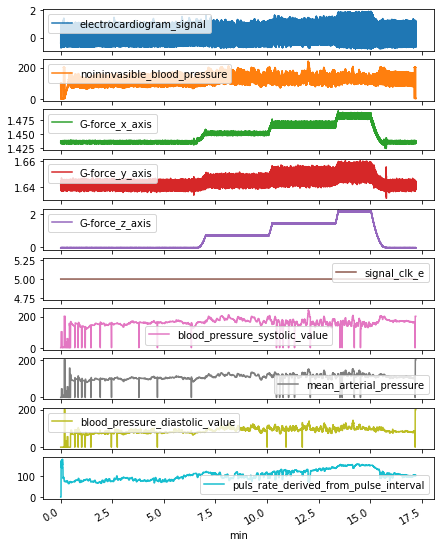

In [26]:
df_run_6, _ = ansim.loader.get_single_run_data(runs_paths[6], plot=True, save=False)

NOTE: Channel IDs do not matter. What is important here is Signal and Description.


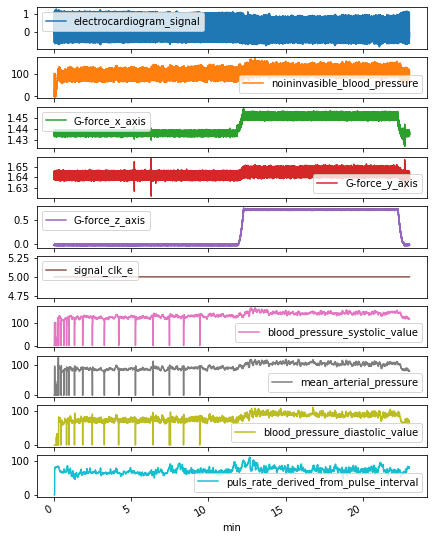

In [27]:
df_run_1, _ = ansim.loader.get_single_run_data(runs_paths[1], plot=True, save=False)

# Convert all to csv

In [45]:
#ansim.loader.convert_runs_to_csv()

In [3]:
# returns a dataframe containing all the metrics of the run
# this is just to check that the metrics are consistent across all runs
metrics_df = ansim.loader.get_all_runs_metrics()

In [4]:
metrics_df.head()

,"ECG - ECG A, X, ECG2-R","NIBP - NIBP100A - Non-invasive Blood Pressure, HLT100C - A 2",Gx,Gy,Gz-Level,CLK_E,SYS,MEA,DIA,HR,name
0,mV,mmHg,Volts,Volts,G,Volts,mmHg,mmHg,mmHg,BPM,NZP2DE_0_001_0AA_SC1CSP2_FIN1E_2018-11-05T09_2...
1,mV,mmHg,Volts,Volts,G,Volts,mmHg,mmHg,mmHg,BPM,NZP2DE_0_001_0AA_SC1CSP2_FIN1E_2018-11-05T10_3...
2,mV,mmHg,Volts,Volts,G,Volts,mmHg,mmHg,mmHg,BPM,NZP2DE_0_001_0AA_SC1CSP2_FIN1E_2018-11-05T10_5...
3,mV,mmHg,Volts,Volts,G,Volts,mmHg,mmHg,mmHg,BPM,NZP2DE_0_001_0AB_SC1CSP1_BIO1E_2018-11-06T09_3...
4,mV,mmHg,Volts,Volts,G,Volts,mmHg,mmHg,mmHg,BPM,NZP2DE_0_001_0AB_SC1CSP1_BIO1E_2018-11-06T10_0...
